# 0. 필요한 데이터 및 Import 함수 정리

In [ ]:
# 프로파일링을 해보기 위해
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5084037993088ddc451289121a4c3f7d46bebfa6fe3f980c09035b0264816bc6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
# 한글 폰트 사용을 위해

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

#나눔바름 고딕 폰트로 설치하고, 모든 그래프에 대해 이 폰트를 적용하겠다는 의미

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ydata_profiling

### 워드 클라우드 -> 시각화
from wordcloud import WordCloud, STOPWORDS




from bokeh.resources import INLINE
import bokeh.io
bokeh.io.output_notebook(INLINE)
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper,
    BasicTicker, ColorBar,DataRange1d, PanTool, Range1d, WheelZoomTool, BoxSelectTool)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


import nltk
from nltk import pos_tag, pos_tag_sents
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

ModuleNotFoundError: No module named 'ydata_profiling'

# 1. 압축파일 풀기 및 json 파일 panas로 불러오기

- Ram 용량으로 인해 핸들링할 데이터의 조절이 필요하여 review 데이터만 70만개로 확인

In [ ]:
import os
import tarfile
tar_file = '/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/yelp_dataset.tar'

# 파일 해제
if tarfile.is_tarfile(tar_file):
    with tarfile.open(tar_file) as tar:
        tar.extractall()
        print(f"{tar_file} 파일이 성공적으로 해제되었습니다.")
else:
    print(f"{tar_file} 파일은 tar 형식이 아닙니다.")

In [4]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2348758,1575984,80739.0,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1390142,808641,19425.0,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,6182586,301909,83879.0,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,1294814,1154325,114801.0,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,3273772,1231666,98537.0,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990277,1968916,1704905,111608.0,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990278,6194567,1144233,9389.0,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990279,3866735,1578277,65728.0,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990280,5025791,1117125,67627.0,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


## 1-1. chunk 하지 않고 한번에 열기

In [ ]:
import polars as pl

review_df = pl.read_ndjson('/content/yelp_academic_dataset_review.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
review_df = review_df.to_pandas()

## 1-2. chunksize 지정해서 조정

In [ ]:
#1. Business.json - 레스토랑의 위치, 카테고리 및 등급 등 레스토랑 데이터
#2. Review.json - 실제 리뷰 데이터
#3. User.json - 리뷰를 남긴 유저의 데이터
#4. Checkin.json - 업무 시간 및 해당 시간에 들어오는 인원 수 데이터
#5. Tip.json - 짧은 리뷰 데이터
## 리뷰 699만개

# Load the JSON file into a DataFrame with a specified encoding
reviews = pd.read_json('/content/yelp_academic_dataset_review.json',\
                        lines=True, orient='columns', chunksize=700000)

business = pd.read_json('/content/yelp_academic_dataset_business.json',\
                        lines=True, orient='columns',chunksize=1500000)

checkins = pd.read_json('/content/yelp_academic_dataset_checkin.json',\
                        lines=True, orient='columns',encoding="utf-8",chunksize=1500000)

users = pd.read_json('/content/yelp_academic_dataset_user.json',\
                        lines=True, orient='columns',chunksize=1500000)

tips = pd.read_json('/content/yelp_academic_dataset_tip.json',\
                        lines=True, orient='columns',chunksize=1500000)

## 1-3. JsonReader -> Dataframe으로 변경

In [ ]:
for business in business:
  subset_business = business
  break

for review in reviews:
  subset_review = review
  break

for checkin in checkins:
  subset_checkin = checkin
  break

for user in users:
  subset_user = user
  break

for tip in tips:
  subset_tip = tip
  break

### 1-4. 정제된 CSV 추출하는 경우

In [3]:
review_df = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/encoded_review_df.csv')

<ipython-input-3-608f089d81e5>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/encoded_review_df.csv')


In [4]:
user_df = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/encoded_user_df.csv')

<ipython-input-4-72cfbce7f874>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_df = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/encoded_user_df.csv')


In [5]:
biz_df = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/encoded_biz_df.csv')

In [18]:
review = pd.read_csv('/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/review_filter.csv')

In [19]:
review.head(1)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11


# 2. EDA

## 2-1. Review Data EDA

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990282 entries, 0 to 6990281
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  float64
 3   stars        float64
 4   useful       float64
 5   funny        float64
 6   cool         float64
 7   text         object 
 8   date         object 
dtypes: float64(5), object(4)
memory usage: 480.0+ MB


In [ ]:
subset_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    700000 non-null  object        
 1   user_id      700000 non-null  object        
 2   business_id  700000 non-null  object        
 3   stars        700000 non-null  int64         
 4   useful       700000 non-null  int64         
 5   funny        700000 non-null  int64         
 6   cool         700000 non-null  int64         
 7   text         700000 non-null  object        
 8   date         700000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 48.1+ MB


In [ ]:
subset_review.shape

(700000, 9)

### 2-1-1. 프로파일링

In [ ]:
profile = subset_review.profile_report()
profile

# 70만개의 리뷰 자체에서 한번 보았더니, 우선 대다수의 리뷰에는 useful, funny, cool등이 달려있지 않은 것을 확인 할 수 있음
# useful has 385828 (55.1%)
# funny has 589822 (84.3%)
#cool has 537866 (76.8%)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2-1-2. High Skewed Useful, Cool, Funny Check

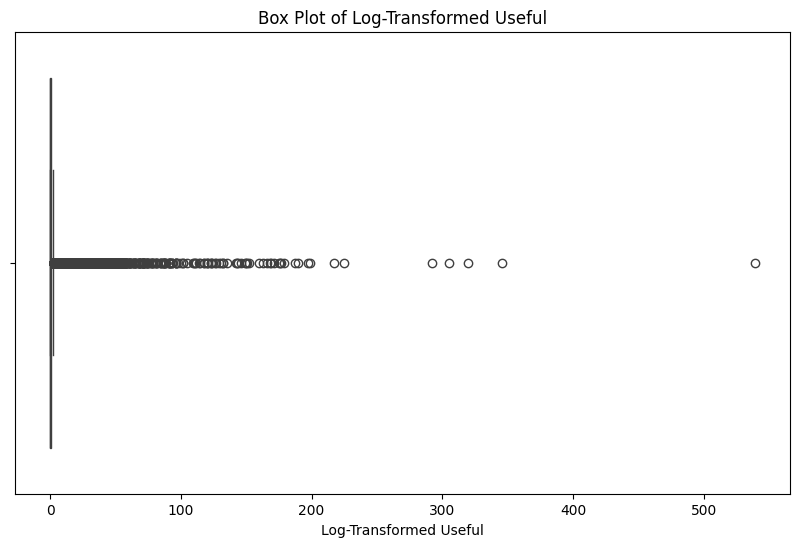

In [ ]:
### 이상치 그려보기
### 이렇게 그려보면 이상치의 시작을 아긴 어려움

df = subset_review
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['useful'])
plt.title('Box Plot of Log-Transformed Useful')
plt.xlabel('Log-Transformed Useful')
plt.show()

상위 25%의 useful 시작되는 시점: 3


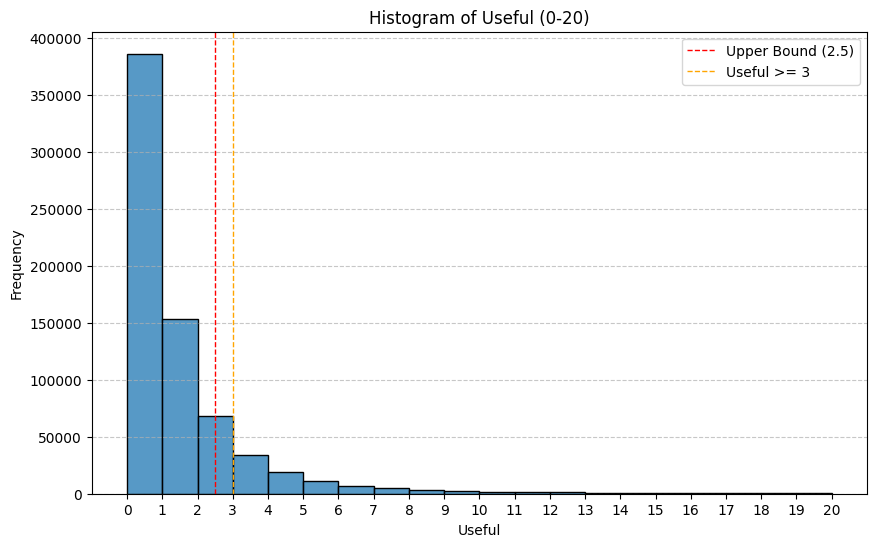

In [ ]:
Q1 = df['useful'].quantile(0.25)
Q3 = df['useful'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로
# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['useful'] > upper_bound]
outliers_start_point = outliers['useful'].min()

print(f"상위 25%의 useful 시작되는 시점: {outliers_start_point}")

## useful이 3이상이면 일반적인 리뷰가 아니라는 것을 의미한다.

# 특정 구간 (예: 0에서 20 사이) 선택
subset_df = df[(df['useful'] >= 0) & (df['useful'] <= 20)]

# 선택된 구간에 대해 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(subset_df['useful'], kde=False, bins=20)

# y축 기준으로 가로선 추가 (점선 스타일과 연한 색상 사용)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 이상치의 경계를 표시하는 수직선 추가
plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=1, label=f'Upper Bound ({upper_bound})')
plt.axvline(x=3, color='orange', linestyle='--', linewidth=1, label='Useful >= 3')

plt.title('Histogram of Useful (0-20)')
plt.xlabel('Useful')
plt.ylabel('Frequency')
plt.xticks(range(21))  # x축 눈금을 0에서 20까지 1씩 증가하도록 설정
plt.legend()
plt.show()

#### funny의 이상치

In [ ]:
Q1 = df['funny'].quantile(0.25)
Q3 = df['funny'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['funny'] > upper_bound]
outliers_start_point = outliers['funny'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

## funny는 1이상

#### cool의 이상치

In [ ]:
Q1 = df['cool'].quantile(0.25)
Q3 = df['cool'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['cool'] > upper_bound]
outliers_start_point = outliers['cool'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

## cool도 이상치는 1 이상

이상치가 시작되는 시점: 1


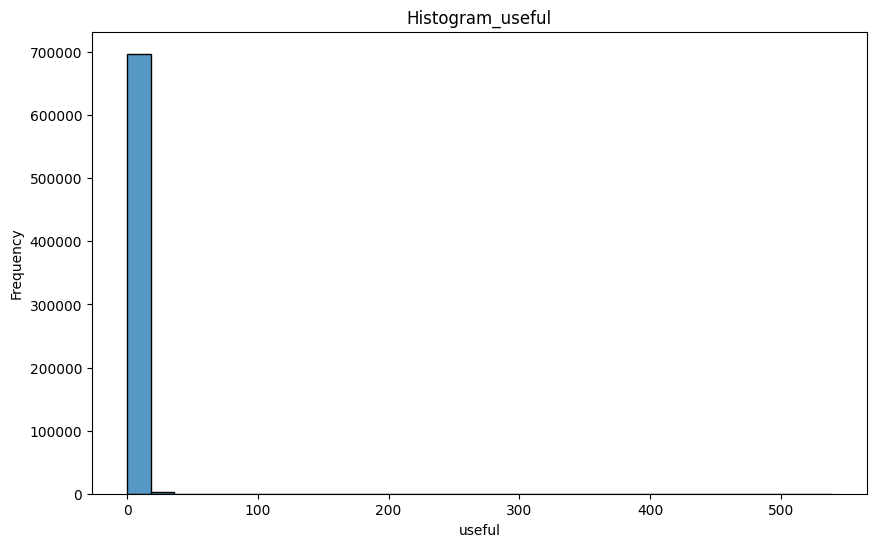

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 예제 데이터프레임 생성 (실제 데이터로 교체)
df = subset_review  # 실제 데이터 파일 경로로 교체

plt.figure(figsize=(10, 6))
sns.histplot(df['useful'], bins=30, kde=False)
plt.title('Histogram_useful')
plt.xlabel('useful')
plt.ylabel('Frequency')
plt.show()


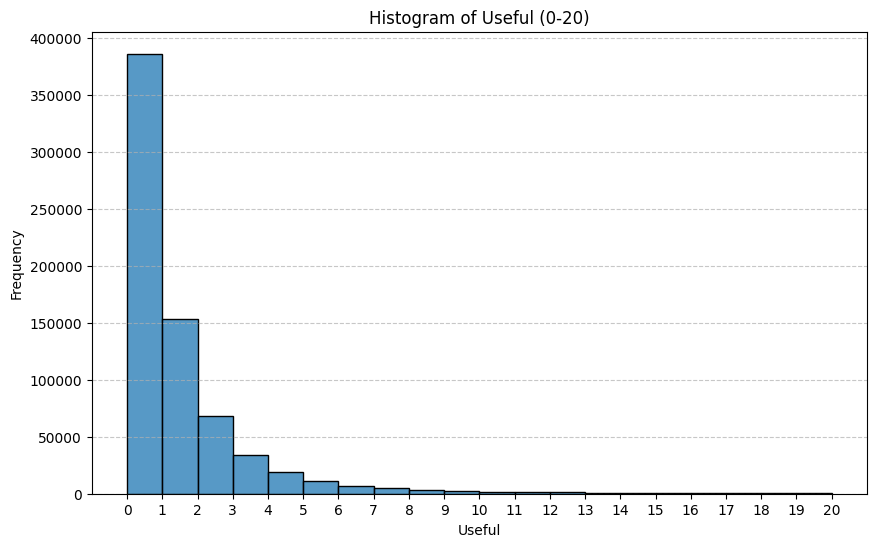

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 업로드된 데이터 로드

# 특정 구간 (예: 0에서 20 사이) 선택
subset_df = df[(df['useful'] >= 0) & (df['useful'] <= 20)]


# 선택된 구간에 대해 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(subset_df['useful'], kde=False, bins=20)  # bin 개수를 20으로 설정
# y축 기준으로 가로선 추가 (점선 스타일과 연한 색상 사용)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram of Useful (0-20)')
plt.xlabel('Useful')
plt.ylabel('Frequency')
plt.xticks(range(21))  # x축 눈금을 0에서 20까지 1씩 증가하도록 설정
plt.show()

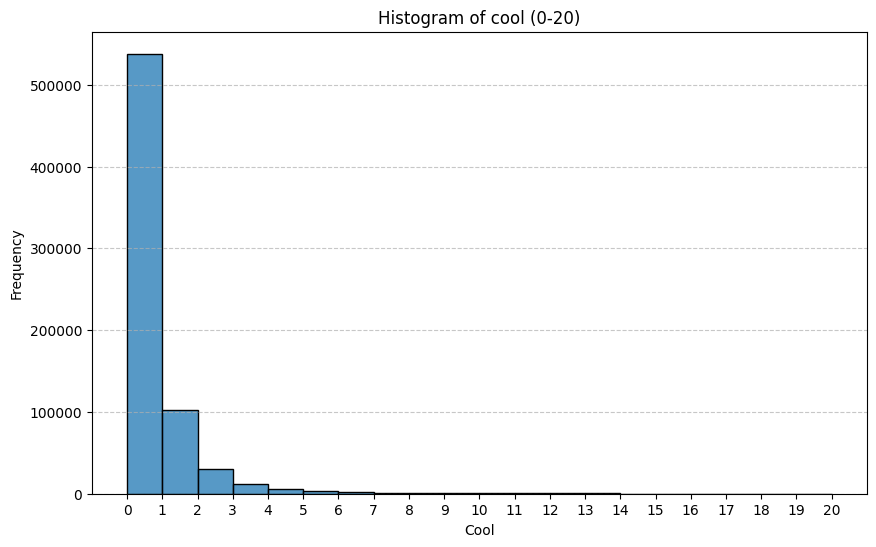

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 업로드된 데이터 로드

# 특정 구간 (예: 0에서 20 사이) 선택
subset_df = df[(df['cool'] >= 0) & (df['cool'] <= 20)]



# 선택된 구간에 대해 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(subset_df['cool'], kde=False, bins=20)  # bin 개수를 20으로 설정
# y축 기준으로 가로선 추가 (점선 스타일과 연한 색상 사용)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram of cool (0-20)')
plt.xlabel('Cool')
plt.ylabel('Frequency')
plt.xticks(range(21))  # x축 눈금을 0에서 20까지 1씩 증가하도록 설정
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['useful'], s=10, label='Data')
plt.scatter(outliers.index, outliers['useful'], s=10, color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Useful')
plt.title('Scatter Plot of Useful with Outliers')
plt.legend()
plt.show()

### 결론: Useful은 3이상, Cool, Funny는 1 이상이면 상위 25%의 리뷰라고 볼 수 있다.

- 일반 리뷰를 1의 중요성을 가진다고 했을 때 상위 25%는 1.5점 정도로 매겨보면 어떨까?
- 상위 25%와 상위 10%는 또 차이가 날 수 있으니 상위 10%는 2점으로 일반 리뷰보다 2배 더 중요하게?

# 리뷰 공감 키워드 분석
 - 리뷰를 보는 유저들이 리뷰를 보면서 남기는 useful, cool, funny는 어떤 영향을 미치는지 알아보자.

## 가설 1 : 가게에 대한 판단을 할 수 있게 도와주는 평점과 가게에 포함된 useful, cool, funny는 선형관계가 있을 것이다


<ipython-input-32-1c33749a595d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='useful', data=summary_sorted, palette=[fillColor])
<ipython-input-32-1c33749a595d>:16: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Count', y='useful', data=summary_sorted, palette=[fillColor])


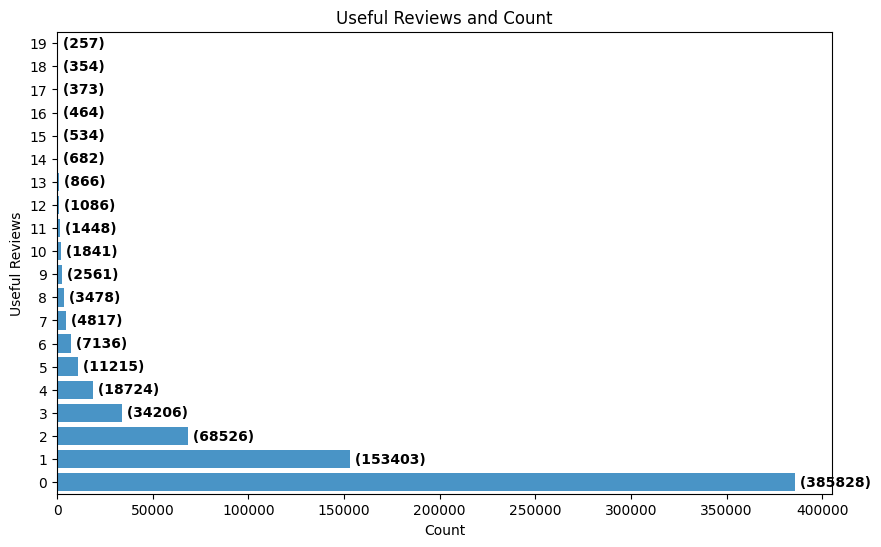

In [ ]:
reviews_filtered = subset_review

# 그룹화 및 요약
summary = reviews_filtered.groupby('useful').size().reset_index(name='Count')

# Count 기준으로 정렬
summary_sorted = summary.sort_values(by='Count', ascending=False).head(20)

# 'useful' 재정렬
summary_sorted['useful'] = summary_sorted['useful'].astype(str)
summary_sorted = summary_sorted.sort_values('Count', ascending=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
fillColor = "#3498db"  # 색상 설정

sns.barplot(x='Count', y='useful', data=summary_sorted, palette=[fillColor])
for index, value in enumerate(summary_sorted['Count']):
    plt.text(value, index, f' ({value})', va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Useful Reviews')
plt.title('Useful Reviews and Count')
plt.show()

### Useful(기본/Top100/Top10) 상관관계


In [ ]:
# 상관관계는 수치로만 볼 수 있기에 먼저 str은 제거한다.
cor_review = subset_review.drop(['review_id','user_id', 'business_id','text', 'date'], axis = 1)

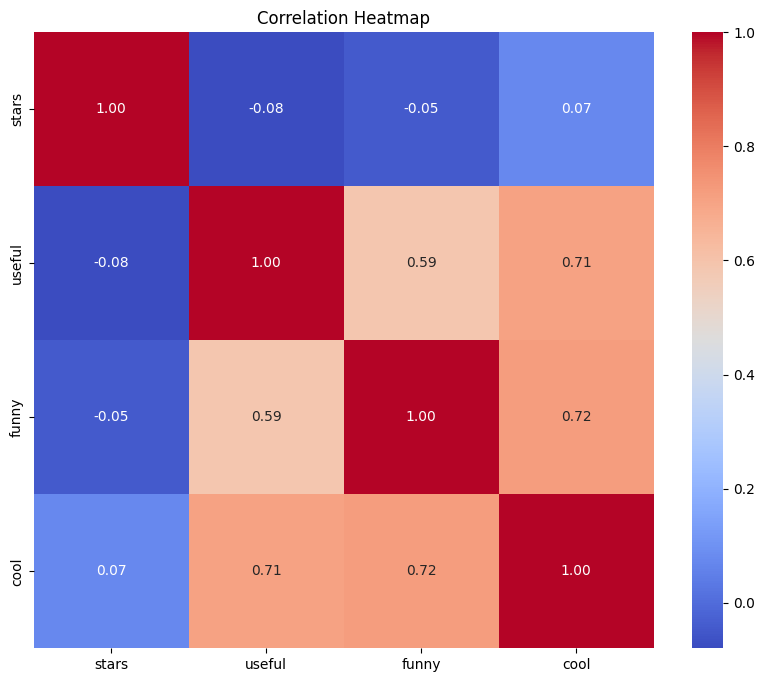

In [ ]:
correlation_matrix = cor_review.corr()

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
subset_business.head(1)

In [ ]:
bus_review = subset_business.merge(subset_review, on='business_id', how='inner')
bus_review.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38


In [ ]:
bus_review.info()
## attributes, categories, hours에 빈값이 존재함.
# 또한, 이 3가지는 모두 object 타입

In [ ]:
useful_sum = bus_review.groupby(['name','business_id','stars_x','stars_y'], as_index=False)['useful'].sum()
top_10_useful= useful_sum.sort_values(by='useful', ascending=False).head(500)


In [ ]:
bus_review.head(1)

In [ ]:
top_10_useful

,name,business_id,stars_x,stars_y,useful
28918,Mazzaro's Italian Market,2KIDQyTh-HzLxOUEDqtDBg,4.5,5,4118
54799,hatWRKS,CkxfUzD10QVOsdWQDucJ6w,3.0,1,3175
27475,Luke,GBTPC53ZrG1ZBY3DT8Mbcw,4.0,5,1498
24889,Kia of Wesley Chapel,29gUltfgj3LBIb7268hi9g,2.0,1,1439
50064,Tower Place,LbhHgTK94bFKIq4owlS9NA,3.5,1,1303
...,...,...,...,...,...
25760,La Patisserie Chouquette,5TVWytR2oNbSKYgfxypuBw,4.0,5,176
8978,Center City Emergency Dentist,6bFx8j2KqPfmT0XEUS1RMg,3.5,1,176
40585,Santa Barbara Shellfish Company,SZU9c8V2GuREDN5KgyHFJw,4.0,2,176
25417,Kung Fu Noodle,AEOd0wRdjeLIXb1usSp9hg,4.0,5,176


In [ ]:
df = bus_review

In [ ]:
print(df[['stars_x', 'useful']].describe())

In [ ]:
correlation = df[['stars_x', 'useful']].corr()
print(f"상관계수: \n{correlation}")

#일반 리뷰별로 가게의 평점과 연관을 지으면 약한 관계가 나타나므로 적절치 못하다.

상관계수: 
          stars_x    useful
stars_x  1.000000 -0.042297
useful  -0.042297  1.000000


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['stars_x'], df['useful'], alpha=0.5)
plt.xlabel('Stars_x')
plt.ylabel('Useful')
plt.title('Scatter Plot of Stars_x vs Useful')
plt.show()

In [ ]:
k_df = pd.DataFrame()

In [ ]:
k_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['useful'].sum()

In [ ]:
top_100_useful= k_df.sort_values(by='useful', ascending=False).head(100)

In [ ]:
k_df

In [ ]:
top_100_useful

In [ ]:
print(k_df[['stars_x', 'useful']].describe())

In [ ]:
correlation = k_df[['stars_x', 'useful']].corr()
print(f"상관계수: \n{correlation}")

# useful을 더해서 계산해도 관계가 낮다..

상관계수: 
          stars_x    useful
stars_x  1.000000  0.037401
useful   0.037401  1.000000


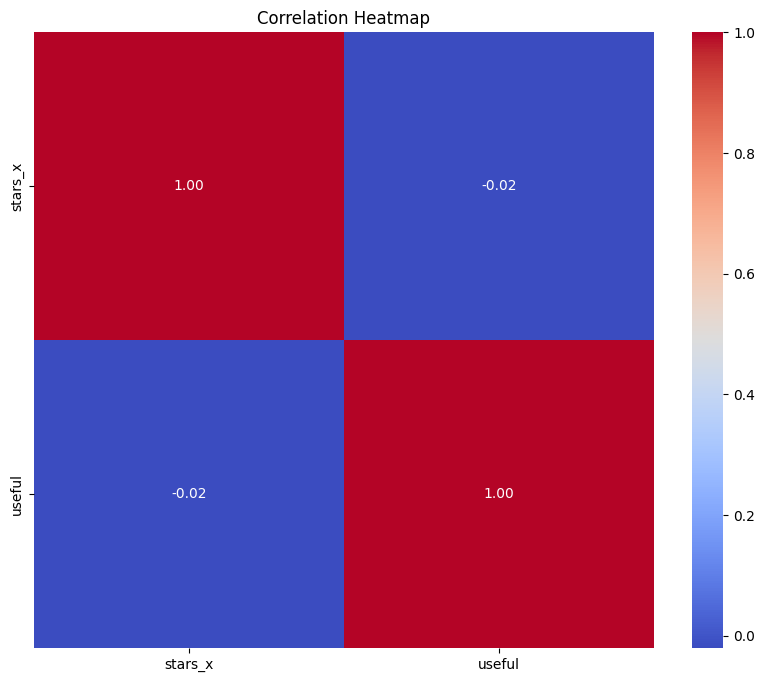

top100 상관계수: 
         stars_x   useful
stars_x  1.00000 -0.02066
useful  -0.02066  1.00000


In [ ]:
correlation = top_100_useful[['stars_x', 'useful']].corr()


# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print(f"top100 상관계수: \n{correlation}")

# 100위

In [ ]:
# 혹시 리뷰 개수가 많을 때 영향을 받을 수 있으므로 개수로 나눠서 확인해보기
k_df['useful_div'] = k_df['useful'] / k_df['review_count']

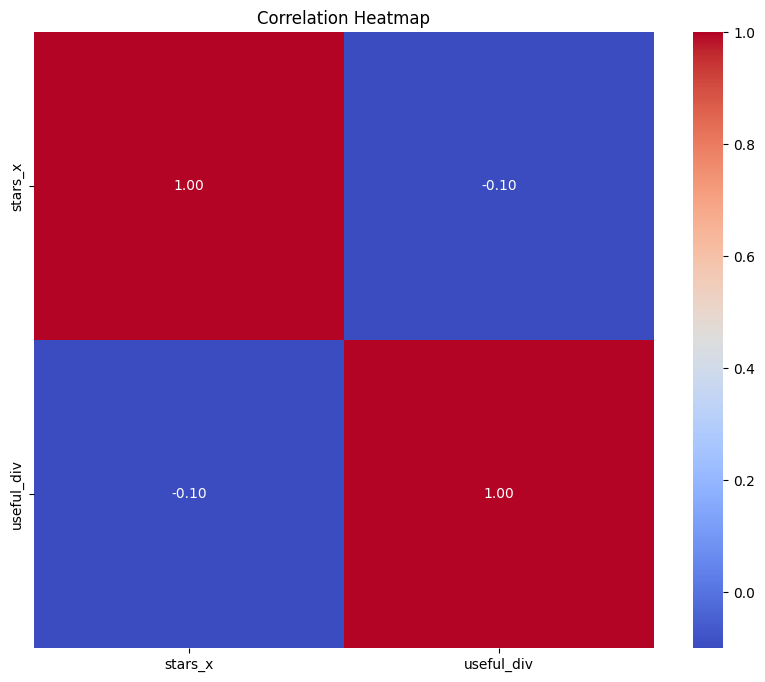

상관계수: 
            stars_x  useful_div
stars_x     1.00000    -0.09995
useful_div -0.09995     1.00000


In [ ]:
correlation = k_df[['stars_x', 'useful_div']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# useful을 리뷰 개수별로 나눠줬더니 -0.1 정도까지는 상승하는 것이 확인이 됨.

In [ ]:
top_100_useful['useful_div'] = top_100_useful['useful'] / top_100_useful['review_count']

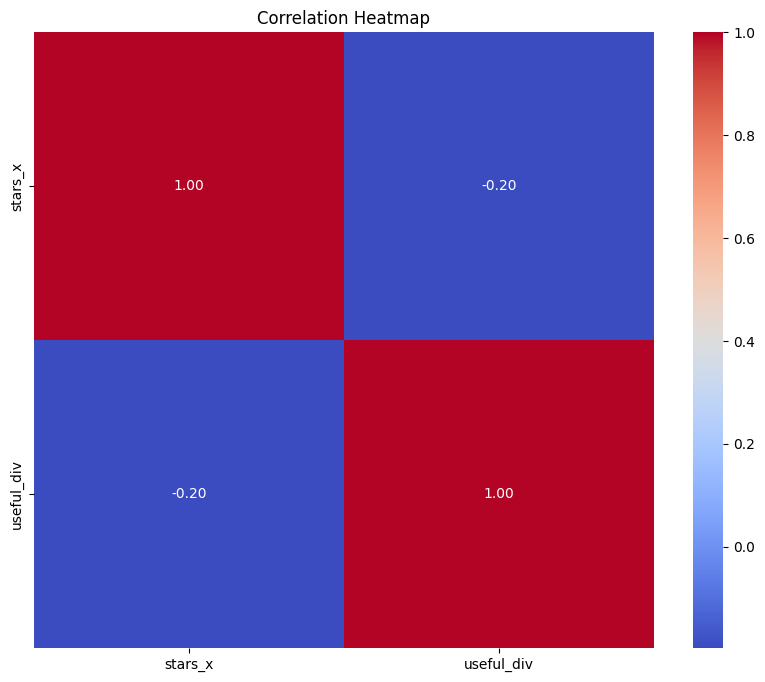

In [ ]:
correlation = top_100_useful[['stars_x', 'useful_div']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

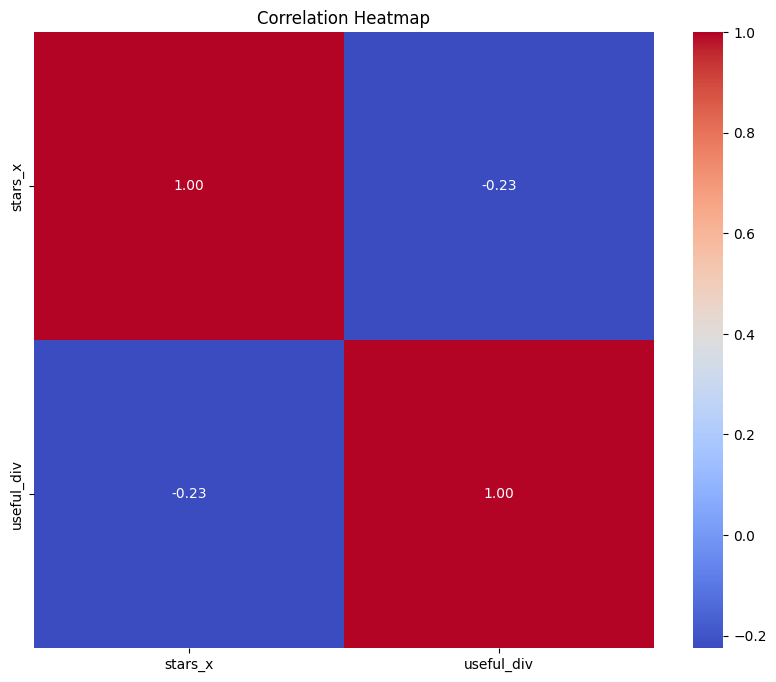

In [ ]:
## 혹시 상위 50위권으로 가면?
top_50_useful= k_df.sort_values(by='useful', ascending=False).head(50)
top_50_useful['useful_div'] = top_50_useful['useful'] / top_50_useful['review_count']

correlation = top_50_useful[['stars_x', 'useful_div']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# 상위 100위 : - 0.2
# 상위 50위 안에서 useful_div로 나눠준 값을 확인해봤더니 -0.22까지도 올라온다.

In [ ]:
top_10000_useful= k_df.sort_values(by='useful', ascending=False).head(10000)


In [ ]:
#top_10_useful['useful_div']

top_10_useful[['useful','review_count']]

,useful,review_count
8003,4874,1551
9610,3732,2486
15005,3552,46
7595,3061,4554
5129,2126,1639
11163,1983,2404
3721,1849,2062
8304,1779,1379
11314,1695,739
10111,1672,2126


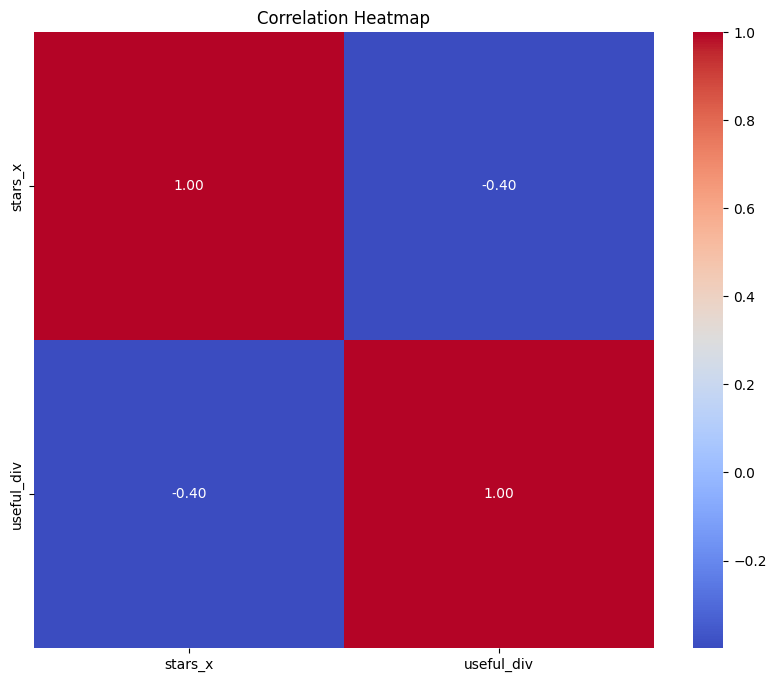

In [ ]:
top_10_useful= k_df.sort_values(by='useful', ascending=False).head(10)
top_10_useful['useful_div'] = top_10_useful['useful'] / top_10_useful['review_count']

correlation = top_10_useful[['stars_x', 'useful_div']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

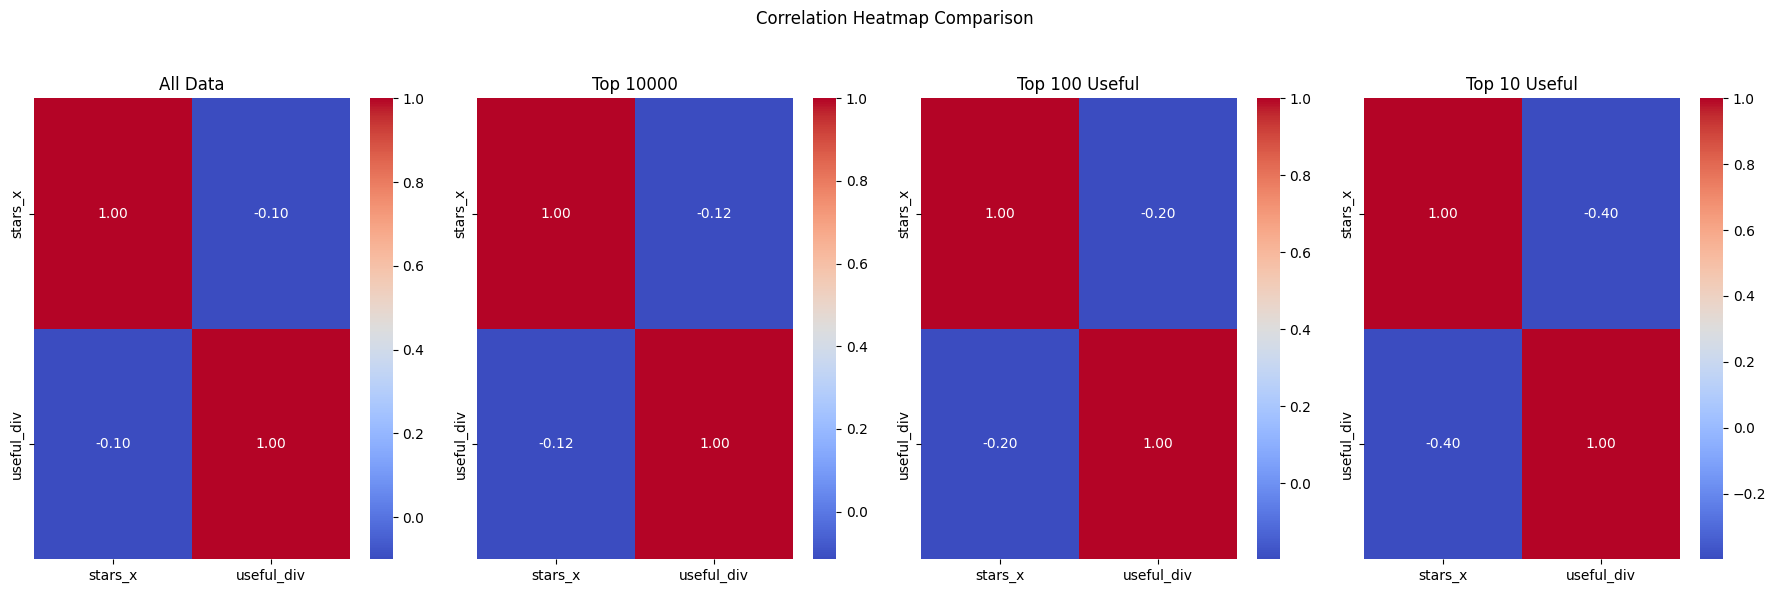

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 준비 (가정)
# top_10_useful, top_50_useful, 전체 데이터셋 k_df 준비

# 상관계수 계산
correlation_top_10 = top_10_useful[['stars_x', 'useful_div']].corr()
correlation_top_100 = top_100_useful[['stars_x', 'useful_div']].corr()
correlation_top_10000 = top_10000_useful[['stars_x', 'useful_div']].corr()
correlation_all = k_df[['stars_x', 'useful_div']].corr()

# 서브플롯 설정
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# 첫 번째 heatmap: 전체 데이터
sns.heatmap(correlation_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('All Data')

sns.heatmap(correlation_top_10000, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1])
axs[1].set_title('Top 10000')

# 두 번째 heatmap: 공감 수치 Top 100
sns.heatmap(correlation_top_100, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[2])
axs[2].set_title('Top 100 Useful')

# 세 번째 heatmap: 공감 수치 Top 10
sns.heatmap(correlation_top_10, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[3])
axs[3].set_title('Top 10 Useful')

plt.suptitle('Correlation Heatmap Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Cool (기본/Top100/Top10) 상관관계

In [ ]:
cool_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['cool'].sum()
top_100_cool= cool_df.sort_values(by='cool', ascending=False).head(100)
top_10_cool= cool_df.sort_values(by='cool', ascending=False).head(10)

In [ ]:
correlation = cool_df[['stars_x', 'cool']].corr()
print(f"기본 df 상관계수: \n{correlation}")
correlation = top_100_cool[['stars_x', 'cool']].corr()
print(f"Top 100 상관계수: \n{correlation}")
correlation = top_10_cool[['stars_x', 'cool']].corr()
print(f"Top 10 상관계수: \n{correlation}")

# cool은 높은것과 상관관계가 낮은 편

기본 df 상관계수: 
          stars_x      cool
stars_x  1.000000  0.122361
cool     0.122361  1.000000
Top 100 상관계수: 
          stars_x      cool
stars_x  1.000000 -0.011362
cool    -0.011362  1.000000
Top 10 상관계수: 
          stars_x      cool
stars_x  1.000000 -0.351927
cool    -0.351927  1.000000


### Funny (기본/Top100/Top10) 상관관계

In [ ]:
funny_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['funny'].sum()
top_100_funny= funny_df.sort_values(by='funny', ascending=False).head(100)
top_10_funny= funny_df.sort_values(by='funny', ascending=False).head(10)

In [ ]:
correlation = funny_df[['stars_x', 'funny']].corr()
print(f"기본 df 상관계수: \n{correlation}")

correlation = top_100_funny[['stars_x', 'funny']].corr()
print(f"Top 100 상관계수: \n{correlation}")

correlation = top_10_funny[['stars_x', 'funny']].corr()
print(f"Top 10 상관계수: \n{correlation}")

# cool은 높은것과 평점이 전혀 관련이 없다고 보여짐


기본 df 상관계수: 
          stars_x     funny
stars_x  1.000000  0.041319
funny    0.041319  1.000000
Top 100 상관계수: 
          stars_x     funny
stars_x  1.000000 -0.030431
funny   -0.030431  1.000000
Top 10 상관계수: 
          stars_x     funny
stars_x  1.000000  0.122539
funny    0.122539  1.000000


In [ ]:
#bus_review로 해도?

Q1 = k_df['useful'].quantile(0.25)
Q3 = k_df['useful'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = k_df[k_df['useful'] > upper_bound]
outliers_start_point = outliers['useful'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

# business_id로 group by를 하면 120이라는 값부터 상위 25%

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_trust, x='trust', y='name', palette='viridis',orient='h')

plt.title('Top 10 Businesses by Trust Score Sum')
plt.xlabel('Total Trust Score')
plt.ylabel('name')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_unique = bus_review_k.drop(columns=['trust_x']).drop_duplicates(subset='business_id')

k = df_unique.drop(columns=['latitude','longitude','postal_code','review_id','date','user_id','stars_y',	'useful','funny',	'cool',	'text'], axis=1)
k.sort_values(by='trust_div', ascending=False).head(2)
#trust_div와 star_x 간의 관계


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터
# data = ...  # 여기에 데이터프레임을 불러오거나 정의하세요.

data = subset_review
# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# 플롯 1: Funny vs Star Rating
sns.scatterplot(ax=axs[0], x='funny', y='stars', data=data, alpha=0.5, s=40, palette='viridis')
axs[0].set_title('Funny vs Star Rating', fontsize=18)
axs[0].set_xlabel('Funny', fontsize=14)
axs[0].set_ylabel('Star Rating', fontsize=14)

# 플롯 2: Cool vs Star Rating
sns.scatterplot(ax=axs[1], x='cool', y='stars', data=data, alpha=0.5, s=40, palette='plasma')
axs[1].set_title('Cool vs Star Rating', fontsize=18)
axs[1].set_xlabel('Cool', fontsize=14)
axs[1].set_ylabel('Star Rating', fontsize=14)

# 플롯 3: Useful vs Star Rating
sns.scatterplot(ax=axs[2], x='useful', y='stars', data=data, alpha=0.5, s=40, palette='inferno')
axs[2].set_title('Useful vs Star Rating', fontsize=18)
axs[2].set_xlabel('Useful', fontsize=14)
axs[2].set_ylabel('Star Rating', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# 신뢰도 점수와 별점의 상관관계 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trust', y='stars', data=subset_review, alpha=0.5)
plt.title('Trust Score vs Star Rating')
plt.xlabel('Trust Score')
plt.ylabel('Star Rating')
plt.show()

#별점의 분포: 별점은 1점부터 5점까지 고르게 분포되어 있으며, 특히 5점과 4점에 많은 리뷰가 집중
#신뢰도 점수의 분포: 신뢰도 점수는 대체로 낮은 값에서 집중되어 있지만, 일부 리뷰는 매우 높은 신뢰도 점수
#신뢰도 점수와 별점 간의 상관관계:
  #눈으로 봤을 때 신뢰도 점수와 별점 사이에 뚜렷한 상관관계가 보이지 않는다.
  #이는 별점과 신뢰도 점수 간의 관계가 명확하지 않다는 것을 의미

1. trust_div : 가게에 달린 리뷰의 평균 신뢰도 점수
2. star_x : 가게의 별점

둘 사이의 상관관계가 있을까?

In [ ]:
cor_test = df_unique.drop(columns=['is_open','latitude','longitude','postal_code','business_id','name_x','name_y','address','city','state','attributes','categories','hours','review_id','date','user_id','stars_y',	'useful','funny',	'cool',	'text'], axis=1)
cor_test.corr()

# trust_y : 가게의 총합 신뢰도 점수
# star_x : 가게의 평균 평점

# user에는 해당 유저가 받은 cool, useful, funny 데이터가 모여있음.
# 가게의 평점이 높으면 신뢰도 있는 리뷰가 있는 가능성이 6%?
# 신뢰도와 가게의 평점 간에는 큰 상관관계는 없어 보인다.

In [ ]:
# 가게의 평균 신뢰도 점수가 높은 순으로 정렬해서 다시 확인했더니
# 특정 가게에서 매우 높은 신뢰도 점수가 나오길래
# 왜 그럴까 찾아보니, 특정 가게에 적힌 특정 리뷰에 강력하게 공감하는 사람들이 많았을 때 점수가 높게 나오는 것으로 확인이 되었음.


## 즉, useful, cool, funny는 특정 댓글들이 실제 유저의 판단에 도움이 되느냐로 봤기에 평점과의 상관 관계가 없었던 것이다.
# 단, 가게에서 남겨진 일반적인 리뷰보다도 훨씬 큰 효과를 불러올 수 있을 것이므로
# 이러한 리뷰가 있다면 가게가 좋은지 나쁜지를 판별할 기준이 될 수 있을 것으로 보인다.

- Dep. Variable (종속 변수) : 만족도가 회귀 모델에서 종속 변수로 사용되었다는 것을 나타낸다.
- Model : 회귀 모델의 종류를 나타낸다. 여기서는 OLS (최소제곱법) 회귀 모델을 사용했다.
- Method : 회귀 분석에 사용된 메소드를 나타낸다. 여기서는 Least Squares (최소제곱법)를 사용했다.
- Date : 회귀 분석이 수행된 날짜
- Time : 회귀 분석이 수행된 시간
- No. Observations : 사용된 샘플의 수 (관측치의 개수)
- Df Residuals : 잔차의 자유도, 모델에서 추정한 파라미터 수를 뺀 값
- Df Model : 모델의 자유도, 사용된 설명 변수의 수
- Covariance Type : 공분산 유형을 나타낸다.



**> 주요 변수**

- coef (계수) : 회귀 계수를 나타낸다. "Intercept"는 절편을, "적절성"은 해당 설명 변수의 회귀 계수를 나타낸다.
- std err (표준 오차) : 회귀 계수의 표준 오차
- t-statistic (t-통계량) : 회귀 계수에 대한 t-통계량을 나타낸다. t-통계량은 해당 계수가 0일 때의 표준 오차에 대한 비율을 나타낸다.
- P>|t| (p-value) : 각 계수에 대한 p-value를 나타낸다. 이 값은 귀무가설이 해당 계수가 0인지에 대한 확률을 나타내며, 일반적으로 0.05보다 작으면 해당 계수는 통계적으로 유의미하다고 판단된다.
[0.025 0.975] : 95% 신뢰구간 (Confidence Interval)을 나타냅니다. 이는 계수가 해당 구간 안에 있을 확률이 95%라는 것을 의미한다.

- R-squared (결정 계수) : 모델이 설명하는 변동의 비율을 나타낸다. 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 것을 의미한다.
- Adj. R-squared (조정된 결정 계수) : R-squared를 보정한 값으로, 모델에 추가된 설명 변수의 수에 대한 보정을 반영한다.


- F-statistic (F-통계량) : 모델 전체의 통계적 유의성을 나타내는 F-통계량이다. 높을수록 모델이 통계적으로 유의미하다는 것을 의미한다.
- Prob (F-statistic) : F-통계량에 대한 p-value를 나타낸다. 이 값이 작으면 모델 전체가 통계적으로 유의미하다고 판단된다.


- Log-Likelihood (로그 우도) : 최대 로그 우도를 나타낸다. 로그 우도가 높을수록 모델이 데이터를 잘 설명하고 있다는 것을 의미한다.
- AIC (Akaike Information Criterion) : 모델의 상대적인 품질을 나타내는 지표 중 하나이다. AIC가 낮을수록 모델이 더 적절하다고 판단된다.
- BIC (Bayesian Information Criterion) : AIC와 유사하게 모델의 상대적인 품질을 나타내는 지표 중 하나이다.


- Omnibus: 잔차의 정규성을 검정하는데 사용되는 값이다. 모델 유의성을 판단할 수 있다.
- Prob(Omnibus) : Omnibus 검정에 대한 p-value를 나타낸다. 0.05보다 작으면 유의하다고 판단된다.
- Durbin-Watson : 잔차의 자기상관을 검정하는데 사용되는 값아다. 잔차의 독립성을 판단할 수 있다.
- Jarque-Bera (JB) : 잔차의 정규성과 첨도에 대한 검정을 수행하는 값입니다. 자기 상관에 대해 판단할 수 있다.
- Prob(JB) : Jarque-Bera 검정에 대한 p-value를 나타낸다. 오차의 정규성 가정을 검정하고, 0.05보다 작으면 유의하다.
- Skew (왜도) : 잔차의 왜도
- Kurtosis (첨도) : 잔차의 첨도
- Cond. No. (Condition Number) : 회귀 행렬의 조건 수를 나타낸다. 이 값이 크면 다중공선성의 가능성이 있을 수 있다.

In [ ]:
X = subset_review[['review_length']]
X = sm.add_constant(X)
y = subset_review['stars']

model = sm.OLS(y, X).fit()
print(model.summary())

# Topic modeling 시도

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 데이터 벡터화
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_reviews = vectorizer.fit_transform(subset_review['text'])

# LDA 모델 훈련 (병렬 처리 및 진행 상황 모니터링)
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, verbose=1)
lda.fit(X_reviews)

# 토픽 출력 함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

In [ ]:
# 감정 분석 (단순 긍정/부정 단어 수 세기) 방법 체크
positive_words = ['good', 'great', 'excellent', 'amazing', 'fantastic']
negative_words = ['bad', 'poor', 'terrible', 'awful', 'worst']

high_trust_reviews['positive_count'] = high_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in positive_words))
high_trust_reviews['negative_count'] = high_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in negative_words))

low_trust_reviews['positive_count'] = low_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in positive_words))
low_trust_reviews['negative_count'] = low_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in negative_words))

print("High Trust Reviews - Positive Word Count: ", high_trust_reviews['positive_count'].mean())
print("High Trust Reviews - Negative Word Count: ", high_trust_reviews['negative_count'].mean())
print("Low Trust Reviews - Positive Word Count: ", low_trust_reviews['positive_count'].mean())
print("Low Trust Reviews - Negative Word Count: ", low_trust_reviews['negative_count'].mean())

# 사람들은 Positive word를 많이 써서 이런 결과가 나오는 걸까?
# 신뢰도 높은 리뷰에 저런 단어가 조금 더 나오는 것 같긴 한데, 일반화 하기 어려운 수치.. word 종류를 늘리고 기준을 바꿔보기도 해야 할듯

In [ ]:
bus_review_k.sort_values(by='trust_y', ascending=False).head(10)

In [ ]:
# #attributes에 있는 key를 뽑아서 사용하기 위해 함수 등록

## Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast

def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")

In [ ]:
## 카테고리로 histogram
#subset_business
df_rest = pd.Series(subset_business['categories']).str.get_dummies(',')

# #'Restaurants'와 'Food' 같은 공통적인 열을 제거하고, 중복되는 카테고리를 합산했음
# df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# 열 이름에서 공백 제거를 해서 저장시키기
df_rest.columns = df_rest.columns.str.lstrip()

# 열 이름이 동일한 경우 합치기
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()
all_rest

In [ ]:
#duckdb
import matplotlib.pyplot as plt

# 상위 20개의 카테고리 선택
top_categories = category_counts.head(20).sort_values(ascending=True)

# 히스토그램 그리기
plt.figure(figsize=(12,10))
top_categories.plot(kind='barh')
plt.title('Top 20 Categories Histogram', fontsize=18)
plt.ylabel('Categories', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 데이터 사용 기간
##

In [ ]:
## 리뷰 키워드를 추출해서
# 카테고리별로 가게별 리뷰 수
# 음식이 제일 작게?
# 배달은 음식에서 벗어나고 있다.

# - 각자 정리한 내용 들어보고, 이를 바탕으로 쓸 수 있는 정보 정리하기
# -> useful, cool, funny


# - 어떻게 "리뷰"를 요약하면 좋을지 결정하기
# - 기획 문서 정리 및 다음주 플래닝 관련 방식 이야기하기

# 리뷰 작성 지역 EDA

1. 가게들이 어디에 몰려 있는지 보자.
2. 특정 지역을 정해서 카테고리별로 정리해보면서 카테고리별 지역 인기랭킹을 뽑아보자


In [ ]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings

#vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.gridspec as gridspec

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

%matplotlib inline

In [ ]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5')
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

### 미국 쪽 데이터만 계속 잡힘..
# 비즈니스 id 개수는 전부 다 가져왔는데, 미국만 보이는 걸로 봐선 미국 쪽 데이터만 있는듯

In [ ]:
# 북미 지역 기준으로 더 디테일하게 그려보기
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")
## 지역을 뽑아봤더니 뉴욕 지역,이나 유명한 지역에서 많이 찍히는 것을 확인할 수 있었다.
# 이 지역이 어디지?

In [ ]:
### yelp dataset에 있는 가게들은 특정 지역에 몰려있는 걸 확인할 수 있었다.

# 저기 캐나다에 하나 잡히는 건 뭐지...

##### 음식점의 카테고리별로 지역 인기 랭킹 뽑아보기

In [ ]:
# 1. 카테고리에서 Rest라는 걸 포함하고 있는 것 가져와서 체크
all_cities = subset_business[subset_business['categories'].str.contains('Rest.*')==True]

# 2. 각 카테고리를 one-hot encoding 하여 구분
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

# 3. Restaurants'와 'Food' 같은 공통적인 열을 제거
df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# 4. 열 이름에서 공백 제거를 해서 저장시키기
df_rest.columns = df_rest.columns.str.lstrip()

# 열 이름이 동일한 경우 합치기
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [ ]:
all_cities[all_cities['is_open']==0]

# 리뷰어의 팬, friends, 가입 연도 : 팬은 숫자 , friends 목록이 있음.
  # 이런게 많으면 리뷰가 더 의미가 있을 것이다?
  # 친구랑 팬이 많으면 그 사람이 남긴 리뷰에 -> elite 일 가능성?
  # elite -> 부정

### attributes : 옵션 기능?

# checkin은 있는데 리뷰는 없다
# 리뷰는 있는데 checkin이 없는 경우 : 오프라인에서 방문하고 따로 리뷰만 여기서 쓴거

In [ ]:
# 도시 이름만 가져와보기
from_business = all_cities[['city']]

In [ ]:
# 바비큐집이 가장 많은 곳이 어디지?
all_rest.join(from_business).groupby('city').sum()['Barbeque'].sort_values(ascending=False).head(10)

In [ ]:
all_rest.join(from_business).groupby('city').sum()['Burgers'].sort_values(ascending=False).head(10)

# 버거 카테고리는 바비큐보다 3배나 많네
# 바비큐랑 다르게 버거는 인디에나 폴리스에 제일 많다

In [ ]:
# 맥주집은 어디에 젤 많을까?
all_rest.join(from_business).groupby('city').sum()['Pubs'].sort_values(ascending=False).head(10)

# 바비큐, 버거, 맥주 둘다 많다고 나오는 쪽은 우선 가게가 많은 곳일 수 있겠다..

In [ ]:
## 필라델피아, 인디에나 폴리스, 새인트 루이스가 자주 등장하니까, 이 세 곳이 핫플로 보인다.

# 필라델피아 버거 핫플
Philadelphia = all_rest.join(subset_business)[all_rest.join(subset_business)['city'] == 'Philadelphia']
phi_1 = Philadelphia[['Burgers','name','address','latitude','longitude','stars','is_open','hours','review_count']]

# 평점으로 정렬하기
phi_1[ (phi_1['Burgers']==1) & (Philadelphia['is_open']==1) ].sort_values(by='stars',ascending=False).head(10)

In [ ]:
#Creating dataset with the data for different cities for further analysis
cities=['Philadelphia','Indianapolis','Tucson']
df_cities=[]

for c in cities:
    city = subset_business[subset_business['city']==c]
    rest = city[city['categories'].str.contains('Rest.*')==True]
    df = pd.Series(rest['categories']).str.get_dummies(',')
    df.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)
    df.columns = df.columns.str.lstrip()
    result = df.groupby(by=df.columns, axis=1).sum()
    df_cities.append(result)

 # Creating separate dataframe for each city.
phila, india, tuc = df_cities[0], df_cities[1], df_cities[2]

In [ ]:
phi = pd.DataFrame(phila.sum().sort_values(ascending=False).head(20),columns=['counts'])
phi.reset_index(inplace=True)
phi.rename({'index':'name'}, axis=1, inplace=True)
phi

# 유흥(Nightlife)이라는 카테고리를 가진 곳이 1037개나 되네
# 나이트클럽, 극장, 레스토랑을 포함하여 마을이나 도시에서 밤에 할 수 있는 사교 활동이나 오락
# 넓은 범위의 카테고리라서 많은 것으로 판단된다.
# 버거는 11위 카테고리 정도

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(12,12))

# Visualizing 20 most popular Categories in Phila Restaurants
phila.sum().sort_values(ascending=True).tail(20).plot(kind='barh', color='Darkcyan', ax=ax)
ax.set_title('Top Categories for Phila Restaurants', fontsize=25, pad=25.0)
ax.set_xlabel("Category counts", fontsize=18)
ax.set_ylabel("Restaurants names", fontsize=18)

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,24))

#plt.barh(tor['name'], tor['counts'],color='Darkcyan')
phila.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='Darkcyan',ax=axes[0])
axes[0].set_title('top categories for phila restaurants',fontsize=25, pad=25.0)
axes[0].xaxis.set_label_text("Category counts", fontsize=18)
axes[0].yaxis.set_label_text("Restaurants names", fontsize=18)

india.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='red',ax=axes[1])
axes[1].set_title('top categories for indiapolis restaurants',fontsize=25, pad=25.0)
axes[1].xaxis.set_label_text("Category counts", fontsize=18)
axes[1].yaxis.set_label_text("Restaurants names", fontsize=18)

tuc.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='blue',ax=axes[2])
axes[2].set_title('top categories for tucsan restaurants',fontsize=25, pad=25.0)
axes[2].xaxis.set_label_text("Category counts", fontsize=18)
axes[2].yaxis.set_label_text("Restaurants names", fontsize=18)

In [ ]:
#get all ratings data
# 리뷰 별점도 높고 리뷰도 많으면 유명한 곳이지 않을까?

rating_data=business[['name','latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

In [ ]:
sorted_rating_data = rating_data.sort_values(by='popularity', ascending=False)
sorted_rating_data.head(10)

# stars와 review_count를 그냥 곱해서 계산하면
# 최근의 점수를 반영하기 힘들고 오래된 가게 일수록 높을 수 밖에 없음
# 더 좋은 가게를 찾아 낼 수 있는 지표를 만든다면 뭐가 있을까?

In [ ]:
subset_business.head(1)

In [ ]:
# 대문자가 연속으로 3개 있는 경우만 가져오는 코드
def emphasize_word(text):
  count = 0
  for char in text:
    if char.isupper():
      count += 1
      if count >= 3:
        return True
    else:
      count = 0
  return False

filtered_reviews = review_df.filter(pl.col("text").apply(emphasize_word))

print(filtered_reviews.head())

In [ ]:
len(filtered_reviews)

# 160만개 정도 #대문자가 포함된 리뷰 개수

In [ ]:
business_df = pl.read_ndjson('/content/yelp_academic_dataset_business.json')

In [ ]:
business_df =  business_df.to_pandas()

In [ ]:
review = filtered_reviews.to_pandas()

In [ ]:
business_df[business_df.is_open == 0].count()  # 30648개

In [ ]:
## Action:
## 1. Drop businesses which are not open (is_open == 0)
## 2. Drop businesses which are not in restaurant business (categories do not contain the keyword "food")
## 3. Drop businesses which have any missing values (remember there were 5 columns with missing values)
## 4. Create a random stratified sample of restaurants with equal weightage to 'stars' column (distinct count = 9)
## 5. Drop unnecessary columns (neighborhood, address, postal_code, is_open, categories) and reindex

def downsize_business(business):
    business.drop(business[business.is_open == 0].index, inplace = True)
    #print(business.count())
    business['categories'] = business['categories'].fillna('')
    business = business[business['categories'].str.lower().str.contains('restaurant')]
    #business1 = business.groupby('stars').apply(lambda x: x.sample(n=1000)) # 각 별점 그룹별로 20개만 뽑아서 진행해본 것. 데이터가 커지니까
    #business1.drop(business1.columns[[3, 6, 11, 12]], axis=1, inplace=True) # neighborhood는 없음
    business1 = business.reset_index(drop=True)
    return business1


# Sentimental Analysis

### nltk.down

In [25]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

### 긍/부정 점수 Part 1 : 전체 문장 1/0 으로 판단

In [ ]:
## Action:

## 1. Clean the text data in review dataset
## 2. Tokenize all text to sentences and then words
## 3. Tag all the words with position tags
## 4. Convert all tags to wrodnet tags
## 5. Lemmatize the words and create synsets
## 6. Compute sentiment score (positive score - negative score)
## 7/ Return a sentiment polarity score: 1 = positive, 0 = negative

#nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

def convert_tag(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def clean_text(text):
    text = text.replace("<br />", " ")
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    #text = text.decode("utf-8")
    return text

def compute_swn_polarity_score(text):
    sentiment_score = 0.0
    num_tokens = 0
    text = clean_text(text)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        tagged_sentence = pos_tag(word_tokenize(sentence))
        for word, tag in tagged_sentence:
            wn_tag = convert_tag(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
            num_tokens += 1
    # sum greater than 0 => positive sentiment
    if sentiment_score >= 0:
        return 1
    # All other scenarios => negative sentiment
    else:
        return 0

In [ ]:
## Action:
## Create a new column 'polarity' with sentiment polarity as 1 (positive) or 0 (negative)
# review2['polarity'] = review2['text'].apply(compute_swn_polarity_score)
# review2.head()
## 백만개는 1시간 넘게 걸릴 것으로 예상
# 540개 가게에서 10000개 정도의 리뷰로 분석해보면 1분 정도

from tqdm import tqdm

tqdm.pandas()
# 새로운 'polarity' 열 생성
review['polarity'] = review['text'].progress_apply(compute_swn_polarity_score)

review[['stars', 'polarity']].groupby(['stars']).mean()
# 평균값에서 보면 별점이 1점이면 낮고, 5점은 높아지는 모습

### 긍/부정 점수 Part 2 : 전체 문장에 노출된 개수에 따라 합산

In [11]:
lemmatizer = WordNetLemmatizer()

def convert_tag(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def clean_text(text):
    text = text.replace("<br />", " ")
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    #text = text.decode("utf-8")
    return text

def compute_swn_polarity_score(text):
    positive_score = 0
    negative_score = 0
    #sentiment_score = 0.0
    num_tokens = 0
    text = clean_text(text)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        tagged_sentence = pos_tag(word_tokenize(sentence))
        for word, tag in tagged_sentence:
            wn_tag = convert_tag(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())

            positive_score += swn_synset.pos_score()
            negative_score -= swn_synset.neg_score()
            #sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
            num_tokens += 1

    return positive_score, negative_score
    # sum greater than 0 => positive sentiment
    # if sentiment_score >= 0:
    #     return 1
    # # All other scenarios => negative sentiment
    # else:
    #     return 0

In [23]:
review.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11


In [22]:
review.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
review.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'main1', 'main2', 'main1_sub1',
       'main1_sub2', 'main2_sub1', 'main2_sub2', 'category', 'category_str',
       'review_count_2'],
      dtype='object')

In [26]:
from tqdm import tqdm

tqdm.pandas()

review['positive'] , review['negative'] = review['text'].progress_apply(compute_swn_polarity_score)

100%|██████████| 2680161/2680161 [3:14:38<00:00, 229.49it/s]


ValueError: too many values to unpack (expected 2)

In [ ]:
review[['stars', 'positive']].groupby(['stars']).mean()


In [ ]:
review[['stars', 'positive']].groupby(['stars']).median()

In [ ]:
review[['stars', 'negative']].groupby(['stars']).mean()

# 사전 기반의 긍부정 구분에는 문제점이 있다..

1. 한 문장 안에 긍/부정 표현이 모두 섞여 있는 경우 : *사과가 색깔은 좋은데, 맛이 없다.*
2. 같은 단어라도 다른 의미를 지닐 수 있다 : *이 책은 졸리다.(지루하다)이 침대는 졸리다.(편안하다)*
3. 어조에 따라 긍/부정이 나뉠 경우 : *잘 한다. 잘~한다.*
4. 감정을 직접 드러내지 않았으나 표현된 경우 : *별점 다섯개 드립니다.*
5. 비교 시 텍스트 만으로 감성의 차이를 구별할 수 없다. : *A는 B보다 낫다. B는 A보다 낫다.*
